# Linear regression

"Linear regression attempts to model the relationship between two variables by fitting a linear equation to observed data." [[link](http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm)]

![Linear regression example](https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/320px-Linear_regression.svg.png)

## Data selection:

(442,)
(442,)


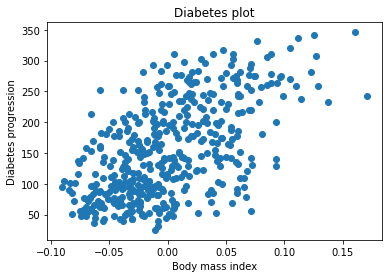

In [0]:
# Getting data
from sklearn import datasets

# Load the diabetes dataset
diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True)
diabetes_X = diabetes_X[:,2]

print(diabetes_X.shape) # third parameter is "Body mass index"
print(diabetes_Y.shape) # quantitative measure of disease progression one year after

dataset_X = diabetes_X
dataset_Y = diabetes_Y

import matplotlib.pyplot as plt

plt.scatter(dataset_X, dataset_Y)  
plt.title('Diabetes plot')  
plt.xlabel('Body mass index')
plt.ylabel('Diabetes progression')
plt.show()

## Analysis

In [0]:
# Insert a line
# line as a model can be described as: y = ax + b,
# where we are looking for parameters a and b

(100,)
(100,)


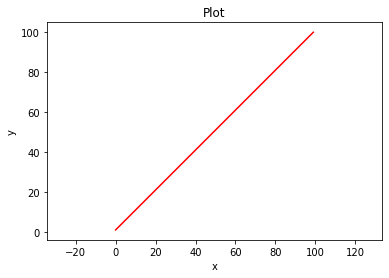

In [0]:
import numpy as np

a = 1
b = 1

def line_function(x):
    global a, b
    y = a*x + b
    return y


sample_x = np.asarray(range(0,100))
sample_y = np.asarray(list( map(line_function, sample_x) ))

print(sample_x.shape)
print(sample_y.shape)

plt.plot(sample_x, sample_y, color="red")
plt.title('Plot')  
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal')
plt.show()

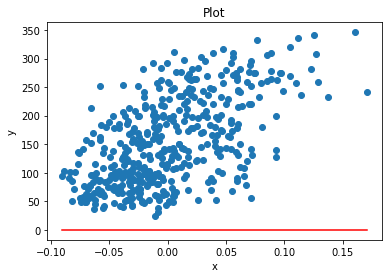

In [0]:
# Together, manually trying it:

a = 0
b = 0

from_x = min(dataset_X)
to_x = max(dataset_X)
sample_x = np.asarray([from_x, to_x])
sample_y = np.asarray(list( map(line_function, sample_x) ))


plt.plot(sample_x, sample_y, color="red")
plt.scatter(dataset_X, dataset_Y)  
plt.title('Plot')  
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
# How can we measure "how bad" vs "how well" we are doing?
# Metric = Square of the distance between our suggested line and each data point
# This is called Least-Squares Regression

def squared_distance_error(a, b, point):
    # Line y=a*x+b is given by the parameters a and b
    # Point is given by two parameters (x_point, y_point)

    x_point, y_point = point
    line_y = a*x_point + b
    distance = line_y - y_point # distance between point and line
    squared_distance = distance * distance
    return squared_distance

In [0]:
# We care about the mean over all the points

a = 0
b = 0

accumulated_error = 0

number_of_points = len(dataset_X)
for index in range(number_of_points):
    point = (dataset_X[index], dataset_Y[index])
    #print(point)
    error = squared_distance_error(a, b, point)
    accumulated_error += error

accumulated_error = accumulated_error / float(number_of_points)

print("The setting of a="+str(a)+" and b="+str(b)+" has the following accumulated least-squares error:", accumulated_error)


The setting of a=0 and b=0 has the following accumulated least-squares error: 29074.481900452487


In [0]:
def evaluate_parameters(a,b):
    accumulated_error = 0

    number_of_points = len(dataset_X)
    for index in range(number_of_points):
        point = (dataset_X[index], dataset_Y[index])
        #print(point)
        error = squared_distance_error(a, b, point)
        accumulated_error += error

    accumulated_error = accumulated_error / float(number_of_points)

    return accumulated_error

In [0]:
# Let's brute force this - try all the possible values in some predefined range
b = 0 # For simplicity let's fix the b
errors_over_a = []
for a in range(-2000, 2000):
    e = evaluate_parameters(a,b)
    errors_over_a.append(e)

errors_over_a = np.asarray(errors_over_a) # numpy array has some nice functions

# We could of course brute force over possible values for b too. Also we could try floats instead of integers only.
# (But there is a better way!)

In [0]:
print("We tested", len(errors_over_a), "possibilities")

minimal_error = np.min(errors_over_a)
minimal_error_index = np.argmin(errors_over_a)
best_a = list(range(-2000, 2000))[minimal_error_index]

print("Best achieved error is", minimal_error, "at index", minimal_error_index, "(which means a="+str(best_a)+")")

We tested 4000 possibilities
Best achieved error is 27035.054017627153 at index 2949 (which means a=949)


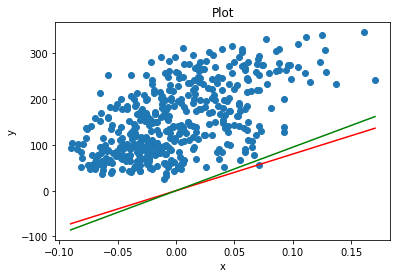

In [0]:
# Let's see it:

a = 800
b = 0

manual_sample_x = np.asarray([from_x, to_x])
manual_sample_y = np.asarray(list( map(line_function, sample_x) ))

a = best_a
b = 0

automatic_sample_x = np.asarray([from_x, to_x])
automatic_sample_y = np.asarray(list( map(line_function, sample_x) ))


plt.plot(manual_sample_x, manual_sample_y, color="red")
plt.plot(automatic_sample_x, automatic_sample_y, color="green")
plt.scatter(dataset_X, dataset_Y)  
plt.title('Plot')  
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
# We can find the optimal solution for this problem ("optimal" = "minimizes the defined least-squares error") mathematically - more details and also derivation here https://www.amherst.edu/system/files/media/1287/SLR_Leastsquares.pdf

In [0]:
# Using some python libraries to do all the heavy lifting for us!

from sklearn import linear_model
from sklearn.metrics import mean_squared_error

model = linear_model.LinearRegression()

model.fit(dataset_X.reshape(-1, 1), dataset_Y)

# The coefficients
sklearn_best_a = model.coef_
sklearn_best_b = model.intercept_
print('intercept:', sklearn_best_b)
print('slope:', sklearn_best_a)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(dataset_X, dataset_Y))


intercept: 152.1334841628967
slope: [949.43526038]
Mean squared error: 29070.19


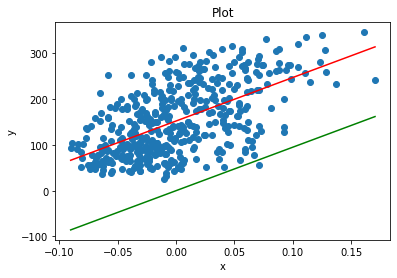

In [0]:
a = sklearn_best_a
b = sklearn_best_b

sklearn_sample_x = np.asarray([from_x, to_x])
sklearn_sample_y = np.asarray(list( map(line_function, sample_x) ))

plt.plot(automatic_sample_x, automatic_sample_y, color="green")
plt.plot(sklearn_sample_x, sklearn_sample_y, color="red")
plt.scatter(dataset_X, dataset_Y)  
plt.title('Plot')  
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Using the trained model

Having found the best possible parameters for the model (a,b - the slope and intercept), we can consider this as training...

Using the trained model, we can ask it somewhere (value x) we don't know what the answer (get it as a value y).

In [0]:
a = sklearn_best_a
b = sklearn_best_b

x_query = 0
y_prediction = line_function(x_query)

print("At x="+str(x_query)+" the y is predicted as "+str(y_prediction))

At x=0 the y is predicted as [152.13348416]
